In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train[:5000], x_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [4]:
stand_scale = StandardScaler()

x_train_trans = stand_scale.fit_transform(x_train.reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_trans = stand_scale.transform(x_valid.reshape(-1, 1)).reshape(-1, 28, 28)
x_test_trans = stand_scale.transform(x_test.reshape(-1, 1)).reshape(-1, 28, 28)

In [5]:
# 批归一化：对每一层做归一化处理
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="relu"))
    model.add(keras.layers.BatchNormalization())
    
    """
    model.add(keras.layers.Dense(100))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(activation="relu"))
    """

model.add(keras.layers.Dense(10, activation="softmax"))

In [6]:
model.compile(optimizer=keras.optimizers.SGD(0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics = ["accuracy"])
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

In [8]:
history = model.fit(x_train_trans, y_train, epochs=10, 
          validation_data=(x_valid_trans, y_valid), callbacks=callbacks)

# 速度变慢

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 23s 418us/sample - loss: 1.9086 - accuracy: 0.3676 - val_loss: 1.0484 - val_accuracy: 0.6434
Epoch 2/10
55000/55000 [==============================] - 19s 352us/sample - loss: 1.1069 - accuracy: 0.6115 - val_loss: 0.7868 - val_accuracy: 0.7174
Epoch 3/10
55000/55000 [==============================] - 19s 352us/sample - loss: 0.9515 - accuracy: 0.6621 - val_loss: 0.7024 - val_accuracy: 0.7478
Epoch 4/10
55000/55000 [==============================] - 18s 335us/sample - loss: 0.8730 - accuracy: 0.6860 - val_loss: 0.6589 - val_accuracy: 0.7624
Epoch 5/10
55000/55000 [==============================] - 19s 344us/sample - loss: 0.8183 - accuracy: 0.7051 - val_loss: 0.6051 - val_accuracy: 0.7772
Epoch 6/10
55000/55000 [==============================] - 19s 337us/sample - loss: 0.7873 - accuracy: 0.7182 - val_loss: 0.5780 - val_accuracy: 0.7876
Epoch 7/10
55000/55000 [=====================

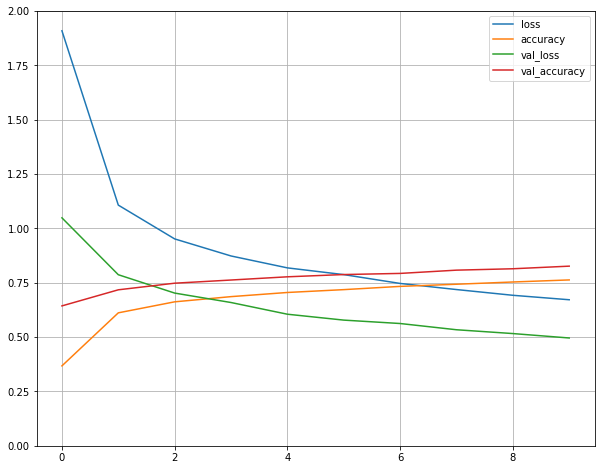

In [9]:
def plt_learning_curve(history):
    pd.DataFrame(history).plot(figsize=(10,8))
    plt.grid(True)
    plt.ylim(0, 2)
    plt.show()
    
plt_learning_curve(history.history)
# 0-5,accurancy,增幅较小
# 原因：1，参数多，训练不充分
#      2，梯度消失 - 链式法则 - 复式函数法f(g(x))

# 批归一化可以缓解梯度消失

In [10]:
model.evaluate(x_test_trans, y_test)

10000/10000 [==============================] - 1s 138us/sample - loss: 0.5277 - accuracy: 0.8075


[0.527704416847229, 0.8075]